In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal as normd
%matplotlib inline

# Particle resampling

The goal of this notebook is to investigate how a discrete velocity distribution of N velocities can be resampled into M others. The idea is to use the Kernel Density Estimation method

## First generate the gridded distribution from the discrete one

We first draw 1000 2D velocities from a Maxwellian distribution with $\sigma = 0.2$ and represent the discrete distribution with a scatter plot

In [68]:
part_nbr = 100000

In [69]:
v = 0.2*normd(size=(2,part_nbr))

In [88]:
def scatterv(v):
    f,a = plt.subplots(figsize=(7,7))
    a.axvline(ls="--", color="k")
    a.axhline(ls="--", color="k")
    a.scatter(v[0,:], v[1,:], s=1)
    a.set_xlabel(r"$V_x$")
    a.set_ylabel(r"$V_y$")
    a.set_title("Discrete distribution of N={} velocities".format(v.shape[1]))

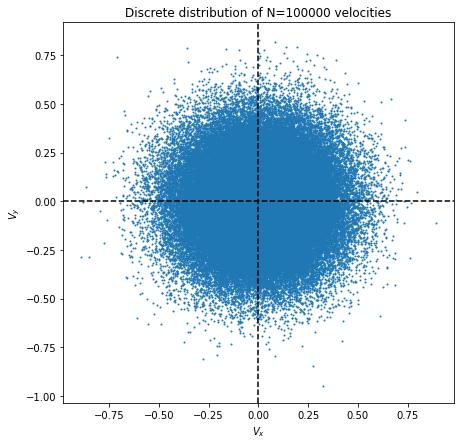

In [89]:
scatterv(v)

In [92]:
def statp(v):
    print("mean : ({:6.5f},{:6.5f}), std : ({:6.5f},{:6.5f})".format(v[0,:].mean(),
                                                 v[1,:].mean(),
                                                 v[0,:].std(),
                                                 v[1,:].std()))

In [93]:
statp(v)

mean : (0.00036,-0.00034), std : (0.19987,0.19957)


Now let's create the "kde kernel" using the scipy gaussian_kde method. The we build the axis coordinates we want to evaluate the kde upon and plot the result

In [63]:
import scipy.stats as stats

In [66]:
kde = stats.gaussian_kde(v)
nvx,nvy = 100,100
# Regular grid to evaluate kde upon
v1 = np.linspace(-0.6,0.6,nvx)
v2 = np.linspace(-0.6,0.6,nvy)
vv1,vv2 = np.meshgrid(v1, v2, indexing='ij')

grid_coords = np.append(vv1.reshape(-1,1),vv2.reshape(-1,1),axis=1)

z = kde(grid_coords.T)
z = z.reshape(nvx,nvy)


/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


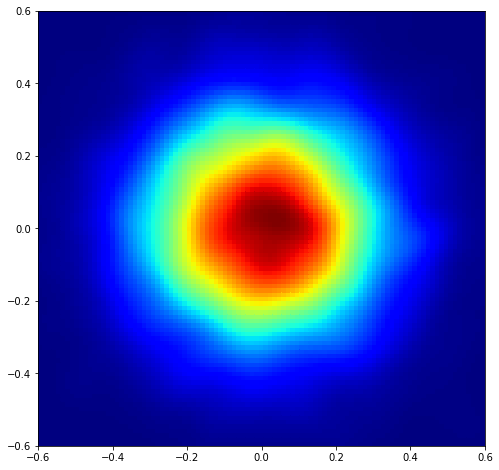

In [67]:

plt.figure(figsize=(8,8))
#plt.imshow(z,aspect=v1.ptp()/v2.ptp(), origin="lower")
plt.pcolormesh(vv1,vv2,z, cmap="jet")

## Then draw M random velocities from t

In [81]:
# we simply resample the kde 
part_nbr2 = 5000
new_vel = kde.resample(part_nbr2)

In [82]:
# and obtain our new velocities
new_vel.shape 

(2, 5000)

Let us now plot our new velocities and print their statistical properties, they should be similar to the original distirbution

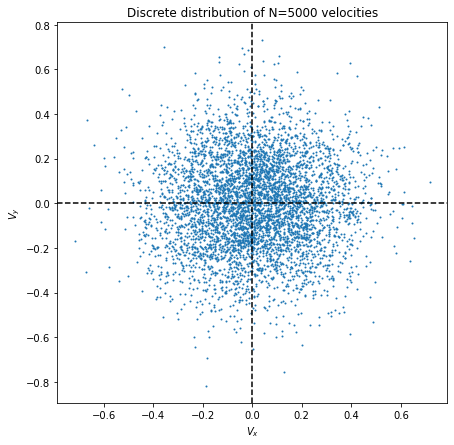

In [95]:
scatterv(new_vel)

In [96]:
statp(new_vel)

mean : (0.00584,-0.00247), std : (0.20420,0.20754)


## The case of a spatially variable distribution of velocities $f(r,v)$

One question is to know the spatial scale over which to select particles to build a gridded distribution when particles are also distributed in space.

The "cell" from the field mesh seems irrelevant since it is not related to any local plasma behavior. Furthermore a cell typically embeds 100 particles, which is quite rough statistically speaking...

One idea could be to build distributions at regularly spaced locations taking all particles around that location until a certain number that is deemed sufficient is reached. That could probably easily be done by drawing a tree over the whole domain, recursively splitting space in smaller regions until there is only 1 particle in each subdivision. Browsing the tree could then provide a list of all M particles neighboring the location at which a distribution is to be built.

However that only consider a statistical argument and the region over which the distribution is made could be arbitrarily large compared to distances that could be considered relevant from a physical standpoint.

For instance, one could define a "local" physical length scale that would be the smallest one to define a distribution centered at location $r$. That distance would be such that it encloses all particles around $r$ with a Larmor radius enabling them to access $r$.

etc.

In [75]:
domain = (10,15)

In [76]:
# generate positions
x = np.random.rand(part_nbr)*domain[0]
y = np.random.rand(part_nbr)*domain[1]

Text(0, 0.5, 'y')

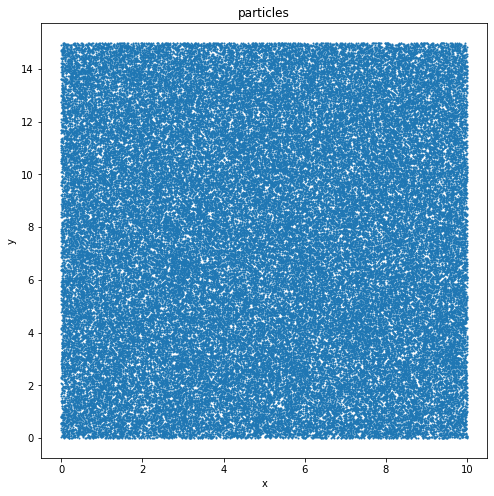

In [80]:
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(x, y, s=1)
ax.set_title("particles")
ax.set_xlabel("x")
ax.set_ylabel("y")

In [ ]:
# build a tree
# compute local larmor radius?